In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!tar -xf /content/drive/MyDrive/Project/ip102_v1.1.tar

In [ ]:
import os
import pandas as pd

# list to store the names of the image files
train_file_names = []
test_file_name = []
val_file_name = []

# List tostore the actual lables of each image
train_actual_labels = []
test_actual_labels = []
val_actual_labels = []

# Read train, test and val file to get the list of files names for each categories

train_file = open("ip102_v1.1/train.txt")
for l in train_file:
    train_file_names.append(l.split(" ")[0])
    train_actual_labels.append(int(l.split(" ")[-1][:-1]))
train_file.close()

test_file = open("ip102_v1.1/test.txt")
for l in test_file:
    test_file_name.append(l.split(" ")[0])
    test_actual_labels.append(int(l.split(" ")[-1][:-1]))
test_file.close()

val_file = open("ip102_v1.1/val.txt")
for l in val_file:
    val_file_name.append(l.split(" ")[0])
    val_actual_labels.append(int(l.split(" ")[-1][:-1]))
val_file.close()

In [ ]:
# Create the folder to store the images
os.mkdir("train")
os.mkdir("test")
os.mkdir("val")

In [ ]:
# Creating list to convert the label to actual name of categories
super_calss = ["Rice",
               "Corn",
               "Wheat",
               "Beet",
               "Alfalfa",
               "Vitis",
               "Citrus",
               "Mango"
              ]
super_class_count = [
    14,13,9,8,13,16,19,10
]

In [ ]:
# This will continue previous process
class_cetegories = []
prev = 0
for i in range(0,len(super_class_count)):
    cl = list(range(prev,prev+super_class_count[i]))
    class_cetegories.append(cl)
    prev = prev + super_class_count[i]

In [ ]:
# Create the subclass in the train, test and val folders to store images
for c in super_calss:
    os.mkdir("train/"+c)
    os.mkdir("test/"+c)
    os.mkdir("val/"+c)
    
class_cetegories

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26],
 [27, 28, 29, 30, 31, 32, 33, 34, 35],
 [36, 37, 38, 39, 40, 41, 42, 43],
 [44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56],
 [57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72],
 [73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91],
 [92, 93, 94, 95, 96, 97, 98, 99, 100, 101]]

In [ ]:
# Define function to map the label number ot the image name
def find_category(inp_cat):
    for i in range(len(class_cetegories)):
        if inp_cat in class_cetegories[i]:
            return super_calss[i]
        

In [ ]:
# Move images from the image folder to the train, test, and val folder
import shutil
root_image_folder = "ip102_v1.1/images/"

# Following for loop to move images to the trianing folder
for i in range(len(train_file_names)):
    name = train_file_names[i]
    label = train_actual_labels[i]
    subfolder = find_category(label)  
    shutil.move(root_image_folder+name,"train/"+subfolder+"/"+name)
    # shutil.move("train/"+subfolder+"/"+name,"val/"+subfolder+"/"+name)

# Following for loop is to move image to the test folder
for i in range(len(test_file_name)):
    name = test_file_name[i]
    label = test_actual_labels[i]
    subfolder = find_category(label)
    shutil.move(root_image_folder+name,"test/"+subfolder+"/"+name)
    # shutil.move("test/"+subfolder+"/"+name,"val/"+subfolder+"/"+name)

# Folloing for loop is to move images to the validation folder
for i in range(len(val_file_name)):
    name = val_file_name[i]
    label = val_actual_labels[i]
    subfolder = find_category(label)
    shutil.move(root_image_folder+name,"val/"+subfolder+"/"+name)
    # shutil.move("val/"+subfolder+"/"+name,"val/"+subfolder+"/"+name)

In [ ]:

os.mkdir("new_train")
os.mkdir("new_train/train")
os.mkdir("new_train/test")
os.mkdir("new_train/val")
for c in super_calss:
    os.mkdir("new_train/train/"+c)
    os.mkdir("new_train/test/"+c)
    os.mkdir("new_train/val/"+c)
    

In [ ]:
train_f = {f:l for f,l in zip(train_file_names,train_actual_labels)}
test_f = {f:l for f,l in zip(test_file_name,test_actual_labels)}
val_f = {f:l for f,l in zip(val_file_name,val_actual_labels)}

In [ ]:

dataclass = {}
class_file = open("/content/drive/MyDrive/Project/classes.txt")
for l in class_file:
    class_idx = int(l.split()[0])-1
    class_name = " ".join(l.split()[1:])
    dataclass[class_idx] = class_name
class_file.close()

In [ ]:
r_folder = "train/"
super_class_names = os.listdir(r_folder)
for sc in super_class_names:
    for img_n in os.listdir(r_folder+sc):
        image_label = train_f[img_n]
        sub_name = dataclass[image_label]
        if not os.path.exists("new_train/"+r_folder+"/"+sc+"/"+sub_name):
            os.mkdir("new_train/"+r_folder+"/"+sc+"/"+sub_name)
            
        shutil.copy(r_folder+sc+"/"+img_n,"new_train/"+r_folder+"/"+sc+"/"+sub_name+"/"+img_n)


In [ ]:
r_folder = "test/"
super_class_names = os.listdir(r_folder)
for sc in super_class_names:
    for img_n in os.listdir(r_folder+sc):
        image_label = test_f[img_n]
        sub_name = dataclass[image_label]
        if not os.path.exists("new_train/"+r_folder+"/"+sc+"/"+sub_name):
            os.mkdir("new_train/"+r_folder+"/"+sc+"/"+sub_name)
            
        shutil.copy(r_folder+sc+"/"+img_n,"new_train/"+r_folder+"/"+sc+"/"+sub_name+"/"+img_n)


In [ ]:
r_folder = "val/"
super_class_names = os.listdir(r_folder)
for sc in super_class_names:
    for img_n in os.listdir(r_folder+sc):
        image_label = val_f[img_n]
        sub_name = dataclass[image_label]
        if not os.path.exists("new_train/"+r_folder+"/"+sc+"/"+sub_name):
            os.mkdir("new_train/"+r_folder+"/"+sc+"/"+sub_name)
            
        shutil.copy(r_folder+sc+"/"+img_n,"new_train/"+r_folder+"/"+sc+"/"+sub_name+"/"+img_n)


In [ ]:
!pip install barbar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import os
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms
import torch.optim as optim
import argparse
from distutils.util import strtobool

In [ ]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16', pretrained=True)

# Add new layer to make it to classify for 8 super class
model.classifier = nn.Sequential(model.classifier,
    nn.Linear(1000, 8))
superModelDict = torch.load("/content/drive/MyDrive/Project/VGG16pretrainedSuperModel")
model.load_state_dict(superModelDict)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

<All keys matched successfully>

In [1]:
models = {}
for m in super_calss:
  models[m] = torch.hub.load('pytorch/vision:v0.10.0', 'VGG16', pretrained=True)
  dropout = 0.5
  num_ftrs = models[m].fc.in_features
  # Add new layer to make it to classify for 8 super class
  models[m].fc = nn.Sequential(
                nn.Dropout(dropout),
                nn.Linear(num_ftrs, len(os.listdir("/content/new_train/test/"+m))))
  superModelDict = torch.load("/content/drive/MyDrive/Project/submodels/"+m)
  models[m].load_state_dict(superModelDict)
  models[m].eval()


In [ ]:
super_calss

['Rice', 'Corn', 'Wheat', 'Beet', 'Alfalfa', 'Vitis', 'Citrus', 'Mango']

In [ ]:
models.keys()

dict_keys(['Rice', 'Corn', 'Wheat', 'Beet', 'Alfalfa', 'Vitis', 'Citrus', 'Mango'])

In [ ]:
from torchvision.transforms.functional import crop
# Following is the image loader
input_size = 224
# Following is the data augmentation Which will be applied during the training
data_transforms = {
            'test': transforms.Compose([
                transforms.Resize(size=(input_size,input_size)),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            ]),
        }


# Following is the dataset loader to save the memoery
batch_size = 32  # Can  be adjusted based on the available ram

test_folder = "test/"  # Validation Data Folder

test_set = ImageFolder(root= test_folder, transform= data_transforms['test'])
class_map = test_set.class_to_idx
test_set = DataLoader(test_set, batch_size= batch_size, shuffle= False)
print(class_map)

{'Alfalfa': 0, 'Beet': 1, 'Citrus': 2, 'Corn': 3, 'Mango': 4, 'Rice': 5, 'Vitis': 6, 'Wheat': 7}


In [ ]:
reverse_classmap = {class_map[k]:k for k in class_map }
reverse_classmap

{0: 'Alfalfa',
 1: 'Beet',
 2: 'Citrus',
 3: 'Corn',
 4: 'Mango',
 5: 'Rice',
 6: 'Vitis',
 7: 'Wheat'}

In [ ]:
# Generate test data for the each of the categories
image_data_gen = {}
image_data_cetegory = {}

for sc in super_calss:
  test_s = ImageFolder(root= "/content/new_train/test/"+sc, transform= data_transforms['test'])
  image_data_cetegory[sc]=test_s.class_to_idx
  test_s = DataLoader(test_s, batch_size= batch_size, shuffle= False)
  image_data_gen[sc] = test_s

In [ ]:
image_data_cetegory

{'Alfalfa': {'Locustoidea': 0,
  'Pieris canidia': 1,
  'Thrips': 2,
  'alfalfa plant bug': 3,
  'alfalfa seed chalcid': 4,
  'alfalfa weevil': 5,
  'blister beetle': 6,
  'flax budworm': 7,
  'legume blister beetle': 8,
  'lytta polita': 9,
  'odontothrips loti': 10,
  'tarnished plant bug': 11,
  'therioaphis maculata Buckton': 12},
 'Beet': {'Beet spot flies': 0,
  'beet army worm': 1,
  'beet fly': 2,
  'beet weevil': 3,
  'cabbage army worm': 4,
  'flea beetle': 5,
  'meadow moth': 6,
  'sericaorient alismots chulsky': 7},
 'Citrus': {'Adristyrannus': 0,
  'Aleurocanthus spiniferus': 1,
  'Aphis citricola Vander Goot': 2,
  'Bactrocera tsuneonis': 3,
  'Ceroplastes rubens': 4,
  'Chrysomphalus aonidum': 5,
  'Dacus dorsalis(Hendel)': 6,
  'Icerya purchasi Maskell': 7,
  'Nipaecoccus vastalor': 8,
  'Panonchus citri McGregor': 9,
  'Papilio xuthus': 10,
  'Parlatoria zizyphus Lucus': 11,
  'Phyllocnistis citrella Stainton': 12,
  'Phyllocoptes oleiverus ashmead': 13,
  'Prodenia li

In [ ]:
model.to("cuda")
model.eval()
for m in models:
  models[m].to("cuda")
  models[m].eval()

In [ ]:
for m in models:
  models[m].eval()

In [ ]:
actual_super_class = []
predicted_super_class = []
actual_subclass = []
predicted_subclass = []
images = []
for sc in reverse_classmap:
  test_images = image_data_gen[reverse_classmap[sc]]
  y_pred_l = []
  y_act_l = []
  i = 0
  for test_data in iter(test_images):
    input_img,target_img = test_data
    
    ac =list(target_img.numpy())
    
    y_act_l.extend(ac)
    
    # input_img.to("cuda")
    pred = model(input_img.cuda())
    torch.cuda.empty_cache()
    input_img.cpu()

    predicted_classss= list(np.argmax(pred.cpu().detach().numpy(),axis=1))
    y_pred_l.extend(predicted_classss)
    

    # process to generate the sub classification
    unique_predicted =np.unique(predicted_classss)
    for u in unique_predicted:
      image_index = np.array(predicted_classss) == u  # Find the index of the given class in the predicted
      actual_class_ofthose = len(list(np.array(ac)[image_index]))*[sc]  # add the actual categories of the super class out of 8 class
      predicted_class_ofthose = list(np.array(predicted_classss)[image_index]) # This is the predicted class of the super class
      c_images = input_img[image_index]  # Images of the u super class 
      act_labels = list(target_img[image_index].numpy()) # it is the actual sub class of images
      actual_super_class.extend(actual_class_ofthose)  # adding the actual super class labels
      predicted_super_class.extend(predicted_class_ofthose) # Adding the predicted super class labels
      actual_subclass.extend(act_labels)  # Adding the actual sub class
      predy = models[reverse_classmap[u]](c_images.cuda())  # Predicting the sub class of the images by selecting the model and storing image on the GPU to speedup the process
      c_images.cpu() # Move images to the CPU() to release the GPU emeory
      predicted_sub_classss= list(np.argmax(predy.cpu().detach().numpy(),axis=1)) # get  the predicted subclass
      predicted_subclass.extend(predicted_sub_classss) # Add the predicted sub class to larger array
      images.append(c_images)
      torch.cuda.empty_cache()


  


In [ ]:
total_count = {}
for c in os.listdir("/content/new_train/test"):
  total_count[c] = len(os.listdir("/content/new_train/test/"+c))

In [ ]:
as_c = [reverse_classmap[c] for c in actual_super_class]
ps_c = [reverse_classmap[c] for c in predicted_super_class]
len(as_c),len(ps_c)

(22619, 22619)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(as_c,ps_c))

              precision    recall  f1-score   support

     Alfalfa       0.69      0.65      0.67      3123
        Beet       0.68      0.57      0.62      1330
      Citrus       0.74      0.71      0.73      2192
        Corn       0.70      0.80      0.75      4212
       Mango       0.78      0.72      0.75      2927
        Rice       0.80      0.83      0.81      2531
       Vitis       0.76      0.80      0.78      5274
       Wheat       0.64      0.57      0.60      1030

    accuracy                           0.74     22619
   macro avg       0.72      0.70      0.71     22619
weighted avg       0.74      0.74      0.73     22619



In [ ]:
reverse_category = {}
for c in image_data_cetegory:
  tmp = {}
  for cc in image_data_cetegory[c]:
    tmp[image_data_cetegory[c][cc]] = cc
  reverse_category[c] = tmp

In [ ]:
actual_y = []
predicted_y = []

for i in range(len(as_c)):
  actual_sname = as_c[i]
  predicted_sname = ps_c[i]
  actual_sub_class = actual_subclass[i]
  predicted_sub_class = predicted_subclass[i]
  actual_y.append(reverse_category[actual_sname][actual_sub_class])
  predicted_y.append(reverse_category[predicted_sname][predicted_sub_class])
  

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(actual_y,predicted_y))
torch.cuda.empty_cache()

                                 precision    recall  f1-score   support

                  Adristyrannus       0.61      0.52      0.56        94
       Aleurocanthus spiniferus       0.85      0.82      0.83       208
                    Ampelophaga       0.72      0.65      0.68       230
    Aphis citricola Vander Goot       0.53      0.51      0.52       106
               Apolygus lucorum       0.36      0.47      0.41       115
           Bactrocera tsuneonis       0.33      0.18      0.23        51
                Beet spot flies       0.73      0.49      0.59        90
   Brevipoalpus lewisi McGregor       0.39      0.67      0.49        24
             Ceroplastes rubens       0.81      0.73      0.77        78
           Chlumetia transversa       0.58      0.43      0.50        92
          Chrysomphalus aonidum       0.80      0.60      0.69        68
              Cicadella viridis       0.75      0.69      0.72       384
                   Cicadellidae       0.80      0.

In [ ]:
t = classification_report(actual_y,predicted_y,output_dict=True)

In [ ]:
pd.DataFrame(t).T.to_csv("/content/drive/MyDrive/Project/classificationResultVGG16plusSubClass07082022.csv")

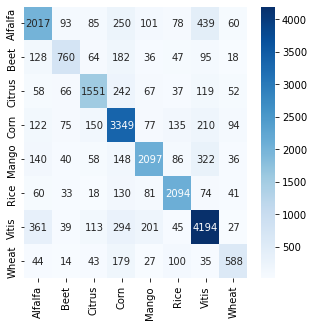

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns
cm = confusion_matrix(as_c,ps_c)
plt.figure(figsize=(5,5))
sns.heatmap(pd.DataFrame(cm,columns=np.unique(as_c),index=np.unique(as_c)),annot=True,fmt="d",cmap='Blues')

In [ ]:
MEAN = torch.tensor([0.485, 0.456, 0.406])
STD = torch.tensor([0.229, 0.224, 0.225])

# Perform inverse Normalization for the visualization
new_image_list_for_vis = []
for set_img in images:
  new_image_list_for_vis.extend([imag * STD[:, None, None] + MEAN[:, None, None] for imag in set_img])
new_image_list_for_vis = [im.T for im in new_image_list_for_vis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2981.)
  


In [ ]:
sub_class_correct_idx = np.array(actual_y) == np.array(predicted_y)
sub_class_incorrect_idx = np.array(actual_y) != np.array(predicted_y)
super_class_correct_idx = np.array(as_c) == np.array(ps_c)
super_inclass_correct_idx = np.array(as_c) != np.array(ps_c)

correct_sublcass_idx = np.array(range(len(actual_y)))[sub_class_correct_idx]
incorrect_sublcass_idx = np.array(range(len(actual_y)))[sub_class_incorrect_idx]

correct_suplcass_idx = np.array(range(len(actual_y)))[super_class_correct_idx]
incorrect_suplcass_idx = np.array(range(len(actual_y)))[super_inclass_correct_idx]
a,b,c,d = correct_sublcass_idx[0],incorrect_sublcass_idx[0],correct_suplcass_idx[1],incorrect_suplcass_idx[1]

Text(0.5, 1.0, 'Actual Super Class: Alfalfa, Predicted Super Class: Mango\nActual Sub Class: Locustoidea, Predicted Sub Class: Dasineura sp')

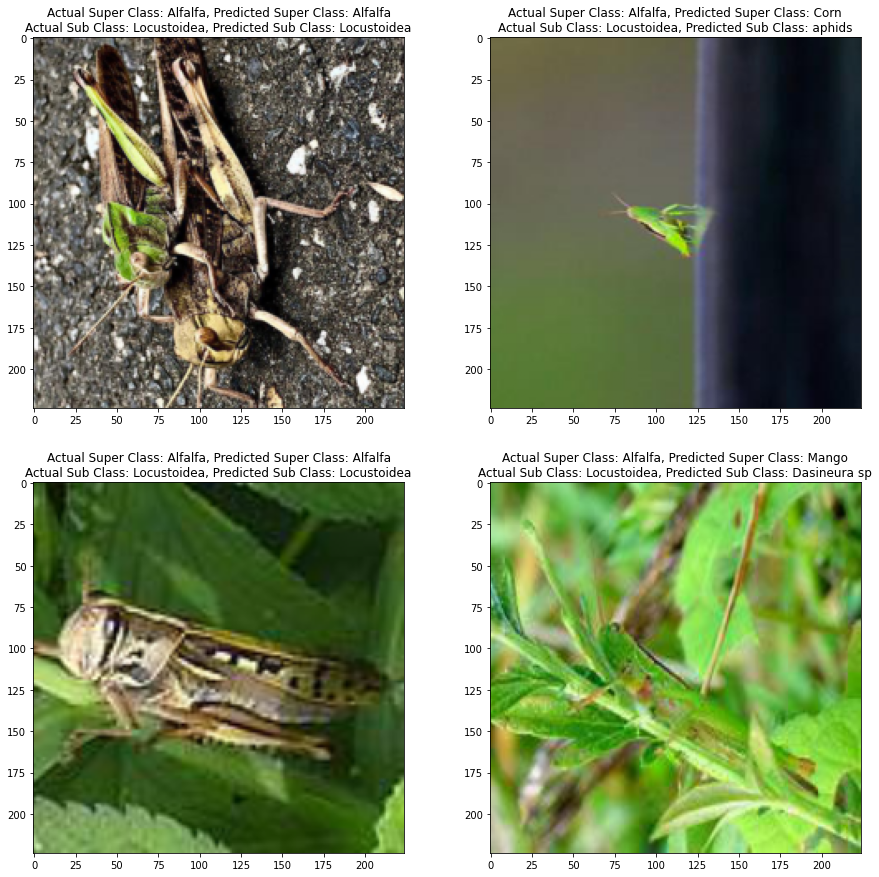

<Figure size 864x864 with 0 Axes>

In [ ]:
figure, axis = plt.subplots(2, 2)
figure.set_figwidth(15)
figure.set_figheight(15)
plt.figure(figsize=(12,12))
axis[0,0].imshow(new_image_list_for_vis[a])
axis[0,0].set_title("Actual Super Class: {}, Predicted Super Class: {}\nActual Sub Class: {}, Predicted Sub Class: {}".format(as_c[a],ps_c[a],actual_y[a],predicted_y[a]))

axis[0,1].imshow(new_image_list_for_vis[b])
axis[0,1].set_title("Actual Super Class: {}, Predicted Super Class: {}\nActual Sub Class: {}, Predicted Sub Class: {}".format(as_c[b],ps_c[b],actual_y[b],predicted_y[b]))

axis[1,0].imshow(new_image_list_for_vis[c])
axis[1,0].set_title("Actual Super Class: {}, Predicted Super Class: {}\nActual Sub Class: {}, Predicted Sub Class: {}".format(as_c[c],ps_c[c],actual_y[c],predicted_y[c]))

axis[1,1].imshow(new_image_list_for_vis[d])
axis[1,1].set_title("Actual Super Class: {}, Predicted Super Class: {}\nActual Sub Class: {}, Predicted Sub Class: {}".format(as_c[d],ps_c[d],actual_y[d],predicted_y[d]))
